Attribute Information:
Variable 	Definition 	Key

PassengerID 	Id of the passenger
Survived 	Flag to indicate whether the passenger survived or not 	0 = No, 1 = Yes

Pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

Name 	Name of the Passenger

Sex 	Sex of the Passenger

Age 	Age in years

SibSp 	# of siblings/spouses aboard the Titanic

Parch 	# of parents/children aboard the Titanic

Ticket 	Ticket number

Fare 	Fare of the ticket

Cabin 	Cabin number

Embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Use Cases/Titanic/Titanic+Data+Set.csv')

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


In [12]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.000,NaN,NaN,NaN,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,NaN,NaN,NaN,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,NaN,NaN,NaN,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891,89,<bound method NDFrame._add_numeric_operations....,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,891.000,NaN,NaN,NaN,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,NaN,NaN,NaN,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.000,NaN,NaN,NaN,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [9]:
data.isnull().sum()
data['Age'] = data['Age'].fillna(value = data['Age'].mean)


In [ ]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
data['Age'].apply(type).value_counts()

<class 'float'>    891
Name: Age, dtype: int64

**Check the missing values**

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are 177 missing values for Age column and 687 missing values for Cabin column and less missing values for Embarked column
-

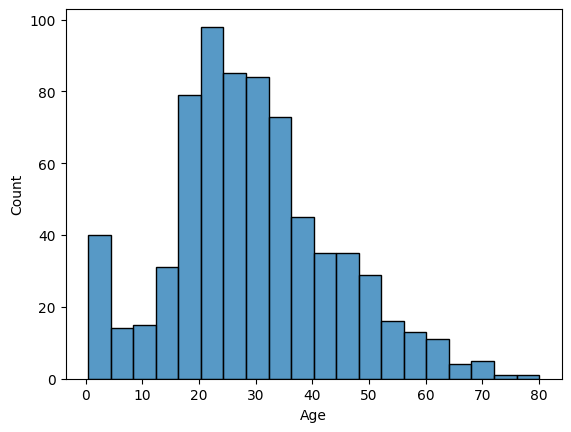

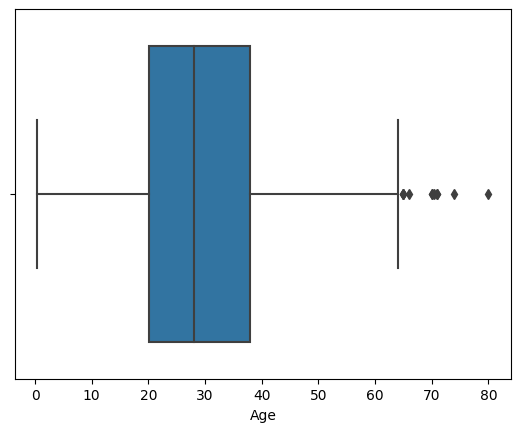

In [19]:
sns.histplot(data=data,x='Age')
plt.show()
sns.boxplot(data=data,x='Age')
plt.show()

#plt.figure(figsize=(10,5))
#sns.scatterplot(data=data,x='Sex',y='Age', hue='Survived')
#plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


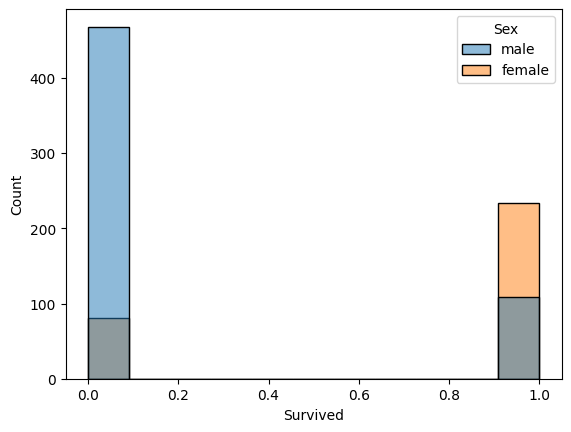

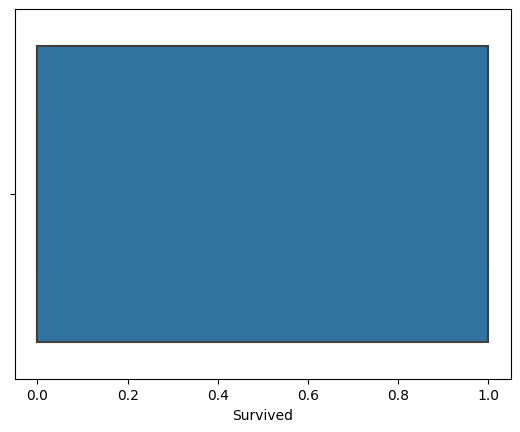

In [9]:
sns.histplot(data=data,x='Survived', hue='Sex')
plt.show()
sns.boxplot(data=data,x='Survived')
plt.show()

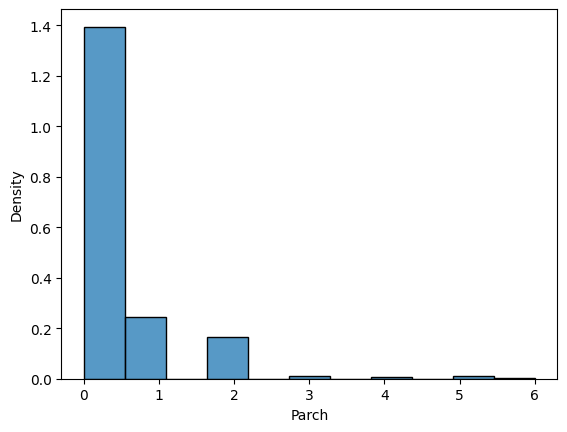

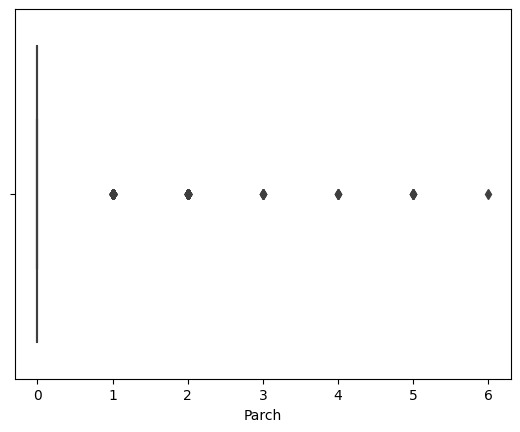

In [ ]:
sns.histplot(data=data,x='Parch',stat='density')
plt.show()
sns.boxplot(data=data,x='Parch')
plt.show()

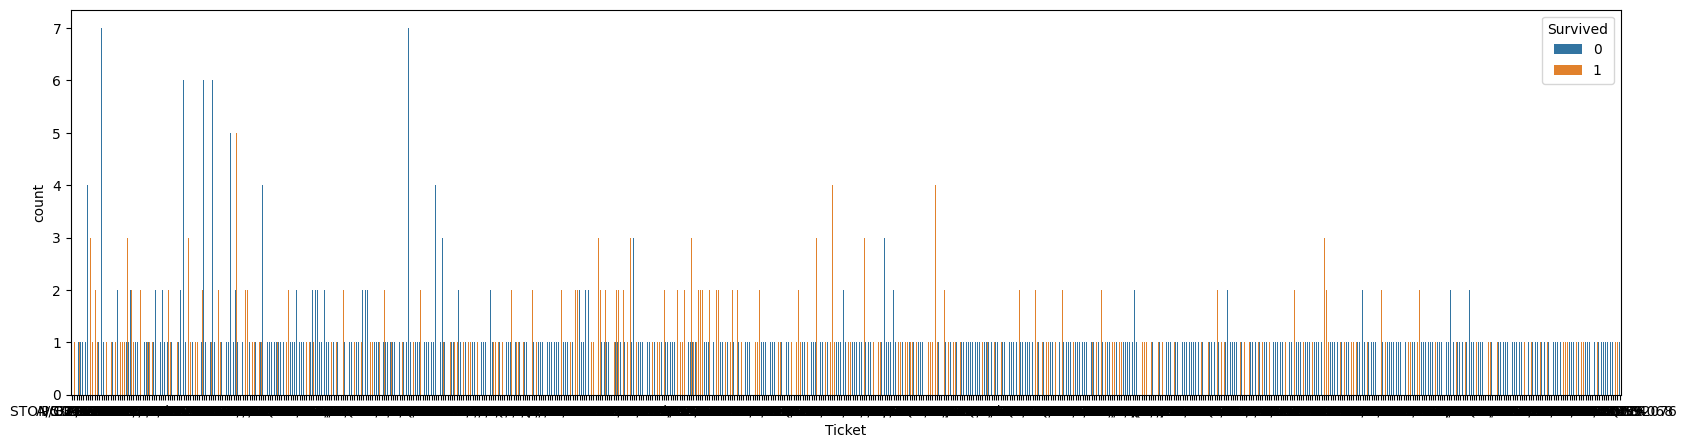

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=data,x='Ticket', hue='Survived')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# checking the average number of Passengers, and Tickets
PassS = data.groupby(['Pclass','Survived']).count()
PassS

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

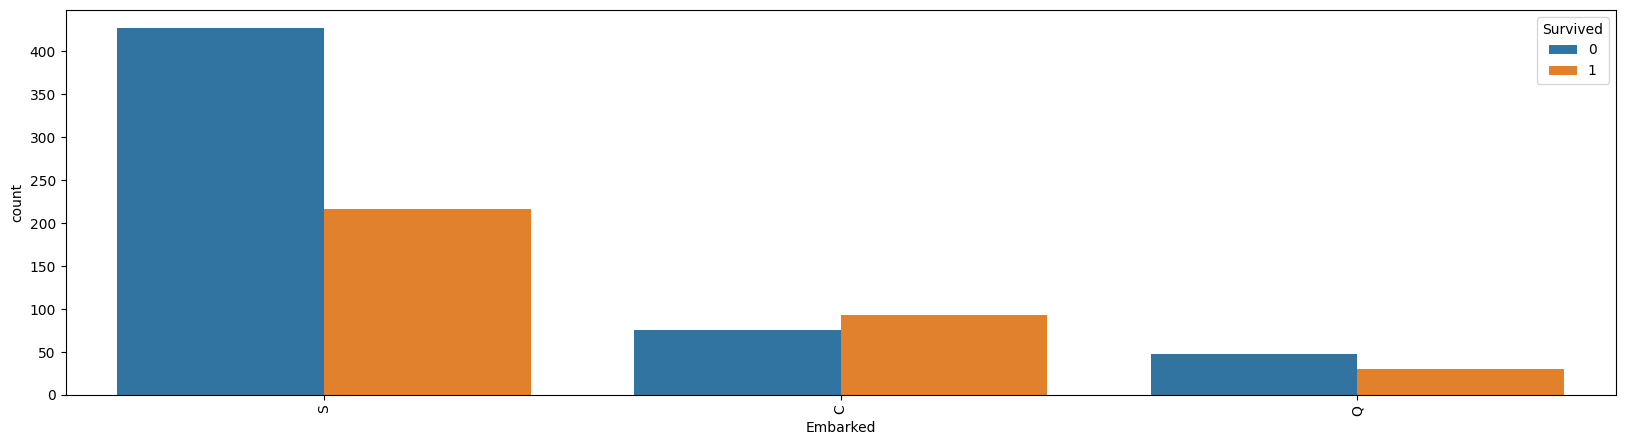

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=data,x='Embarked', hue='Survived')
plt.xticks(rotation=90)
plt.show()

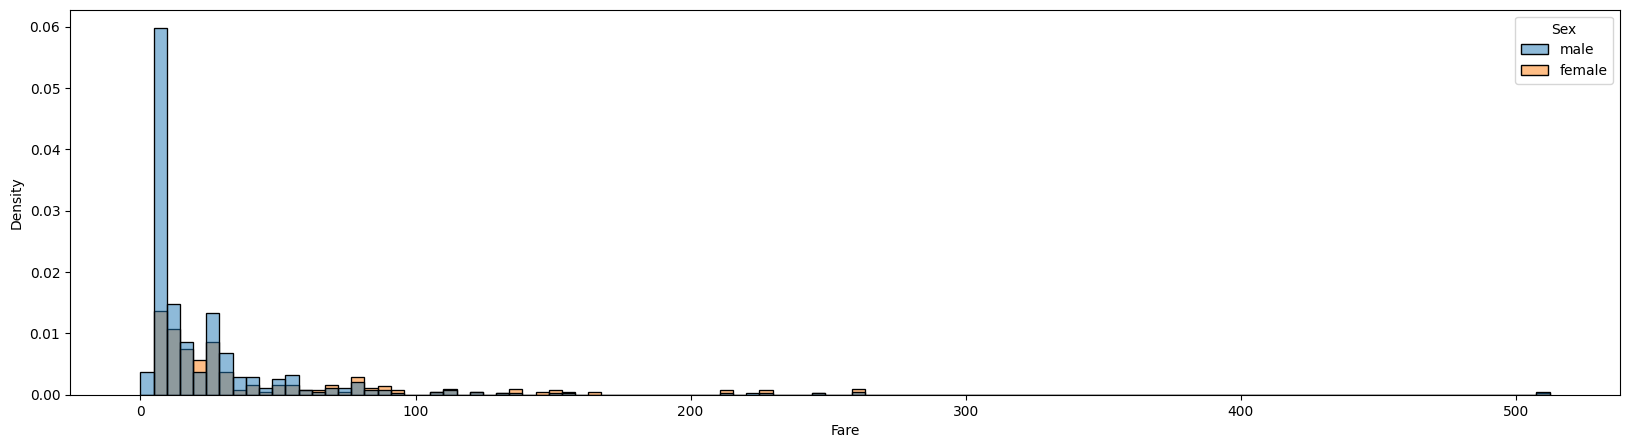

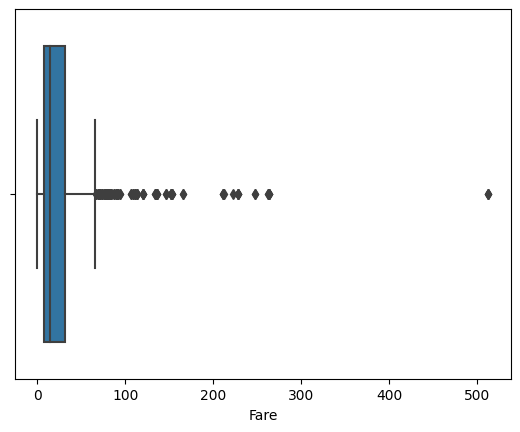

In [ ]:
plt.figure(figsize=(20,5))

sns.histplot(data=data,x='Fare',stat='density', hue='Sex')
plt.show()
sns.boxplot(data=data,x='Fare')
plt.show()